In [1]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms
import scipy.ndimage.morphology as morph
Image.MAX_IMAGE_PIXELS = None
import math
import sys
sys.path.append("..") 
from helper import index as helpers
from collections import deque

In [ ]:
slope = np.load("../../Raw_Data_21_zones/Slope_14.npy")

In [18]:
ditches = np.load("../../Raw_Data_21_zones/Labels3m_14.npy")

In [19]:
impoundment = np.load("../../Raw_Data_21_zones/Impoundment_14.npy")

In [20]:
hpmf = np.load("../../Raw_Data_21_zones/HPMF_14.npy")

In [21]:
skyView = np.load("../../Raw_Data_21_zones/SkyViewFactor_14.npy")

In [26]:
DEM = np.load("../../Raw_Data_21_zones/DEM_14.npy")

In [40]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("Ditch label")
ax[0].imshow(skyView)

In [22]:
smoothedOut = helpers.streamAmplification(impoundment)

In [23]:
overlaySV = skyView.copy()
for i in range(len(skyView)):
    for j in range(len(skyView[i])):
        if smoothedOut[i][j] > 2:
            overlaySV[i][j] = 0.5

In [24]:
overlayDitch = ditches.copy()
for i in range(len(ditches)):
    for j in range(len(ditches[i])):
        if smoothedOut[i][j] > 2:
            overlayDitch[i][j] = 0.5

In [137]:
def DEMDitchDetection(arr):
    newArr = arr.copy()
    maxArr = gf(arr, np.amax, footprint=helpers.create_circular_mask(30))
    minArr = gf(arr, np.amin, footprint=helpers.create_circular_mask(10))
    meanArr = gf(arr, np.median, footprint=helpers.create_circular_mask(10))
    minMaxDiff = arr.copy()
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if minArr[i][j] < maxArr[i][j] - 3:
                minMaxDiff[i][j] = 1
            else:
                minMaxDiff[i][j] = 0
    closing = morph.binary_closing(minMaxDiff, structure=helpers.create_circular_mask(10))
    closing2 = morph.binary_closing(closing, structure=helpers.create_circular_mask(10))
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] < meanArr[i][j] - 0.1:
                newArr[i][j] = meanArr[i][j] - arr[i][j]
            else:
                newArr[i][j] = 0
            if closing2[i][j] == 1:
                newArr[i][j] = 0
    return newArr

In [138]:
funcTest = DEMDitchDetection(DEM)

In [102]:
DEMTest = DEM.copy()
minMaxDiff = DEM.copy()

In [109]:
#DEMmax = gf(DEM, np.amax, footprint=helpers.create_circular_mask(10))
#DEMmin = gf(DEM, np.amin, footprint=helpers.create_circular_mask(10))
#DEMmean = gf(DEM, np.median, footprint=helpers.create_circular_mask(10))
#DEMmedian = gf(DEM, np.mean, footprint=helpers.create_circular_mask(10))
DEMmax30 = gf(DEM, np.amax, footprint=helpers.create_circular_mask(30))

In [131]:
for i in range(len(DEM)):
    for j in range(len(DEM[i])):
        if DEM[i][j] < DEMmean[i][j] - 0.1:
            DEMTest[i][j] = DEMmean[i][j] - DEM[i][j]
        else:
            DEMTest[i][j] = 0
        if closing2[i][j] == 1:
            DEMTest[i][j] = 0

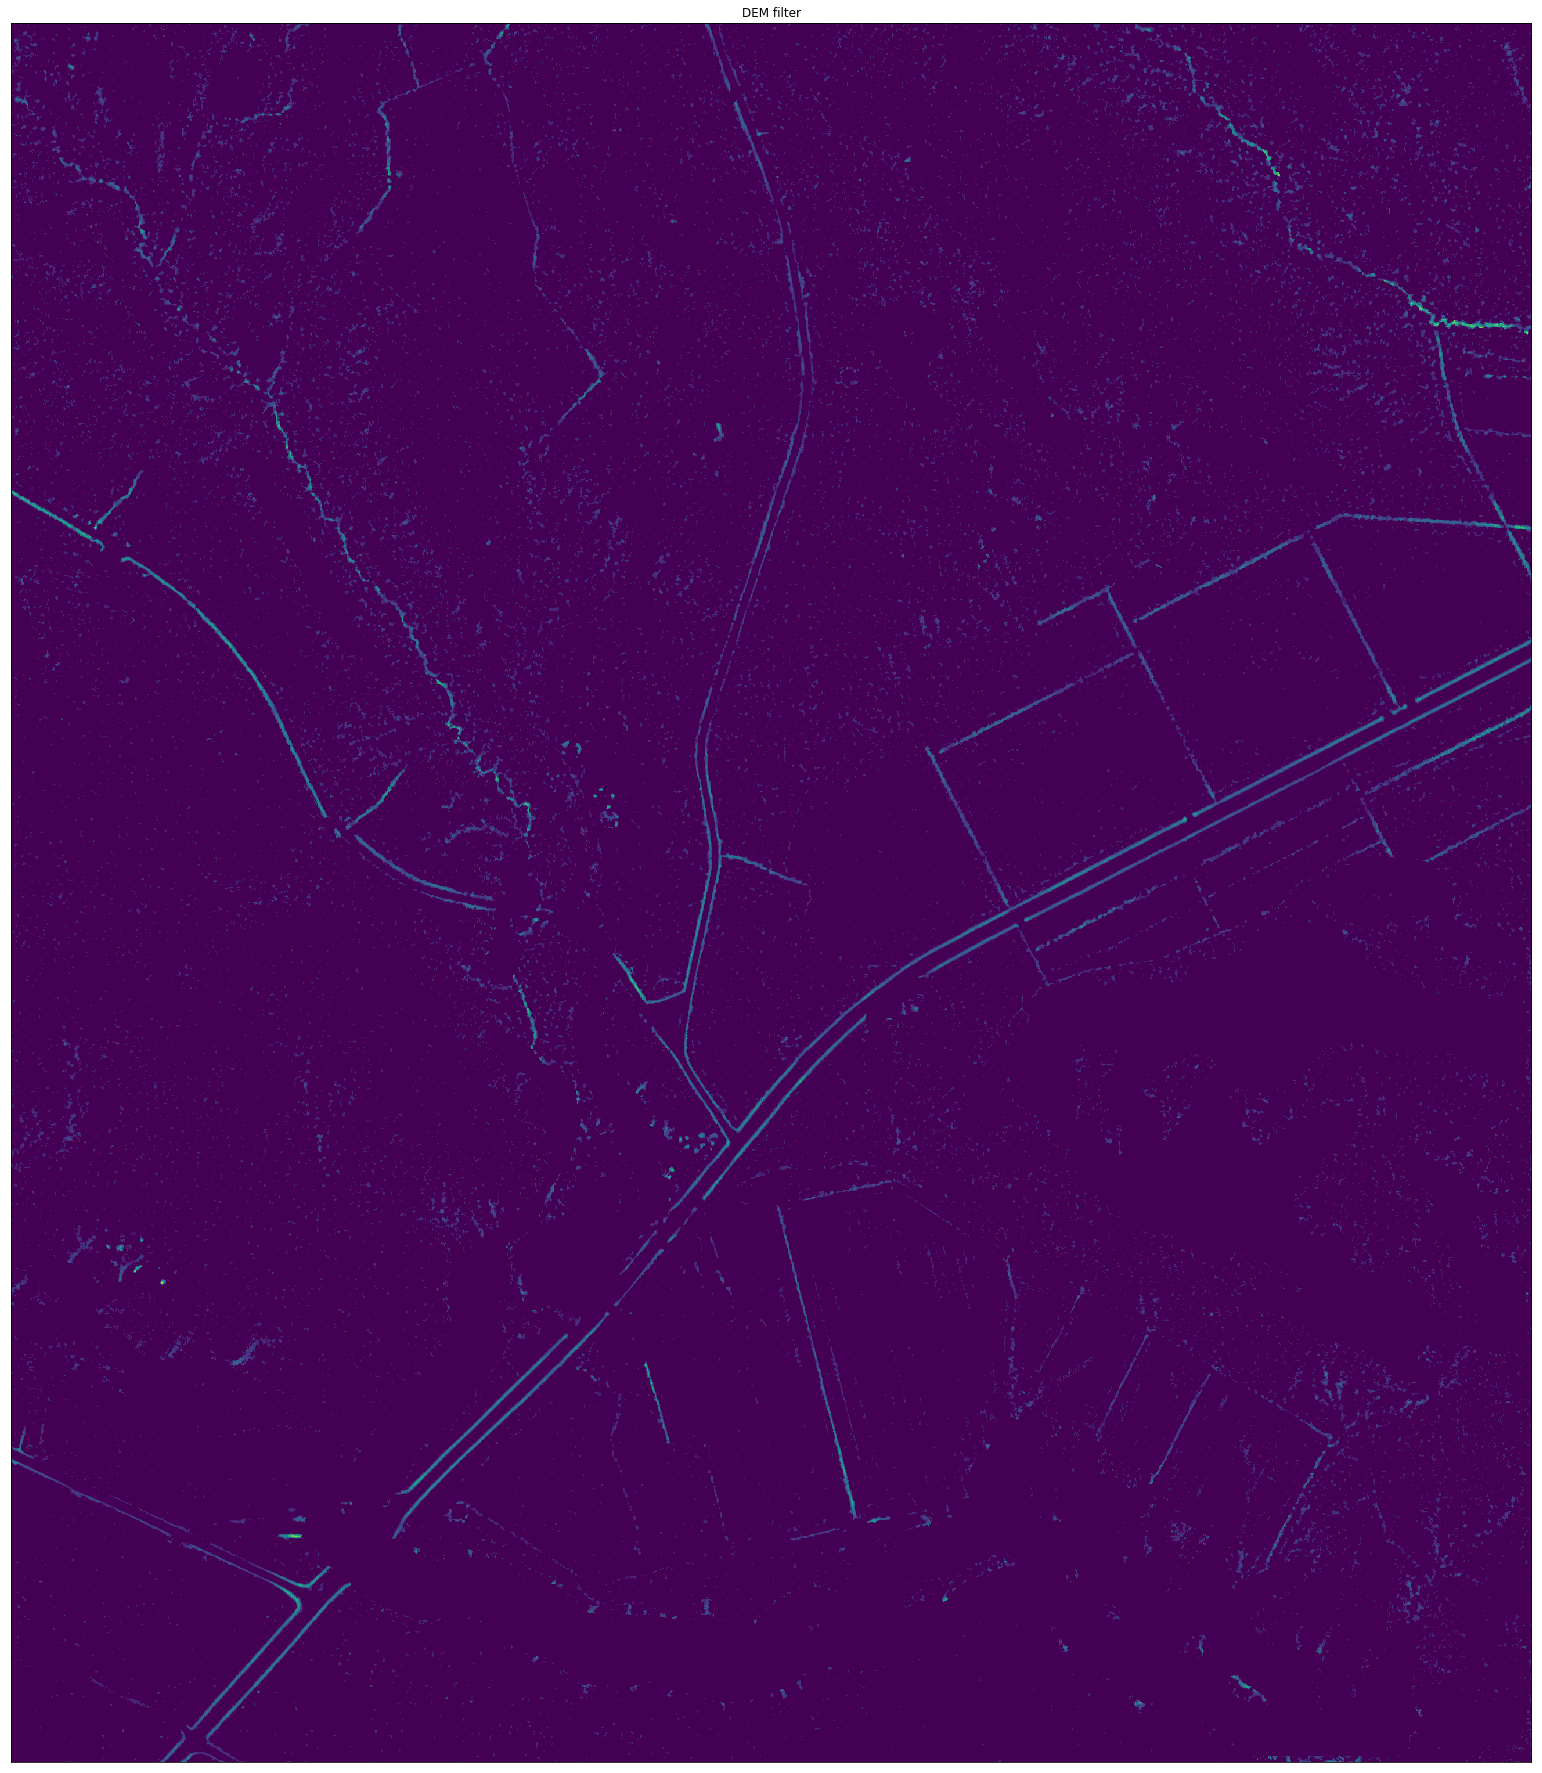

In [139]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("DEM filter")
ax[0].imshow(funcTest)

In [118]:
for i in range(len(DEM)):
    for j in range(len(DEM[i])):
        if DEMmin[i][j] < DEMmax30[i][j] - 3:
            minMaxDiff[i][j] = 1
        else:
            minMaxDiff[i][j] = 0

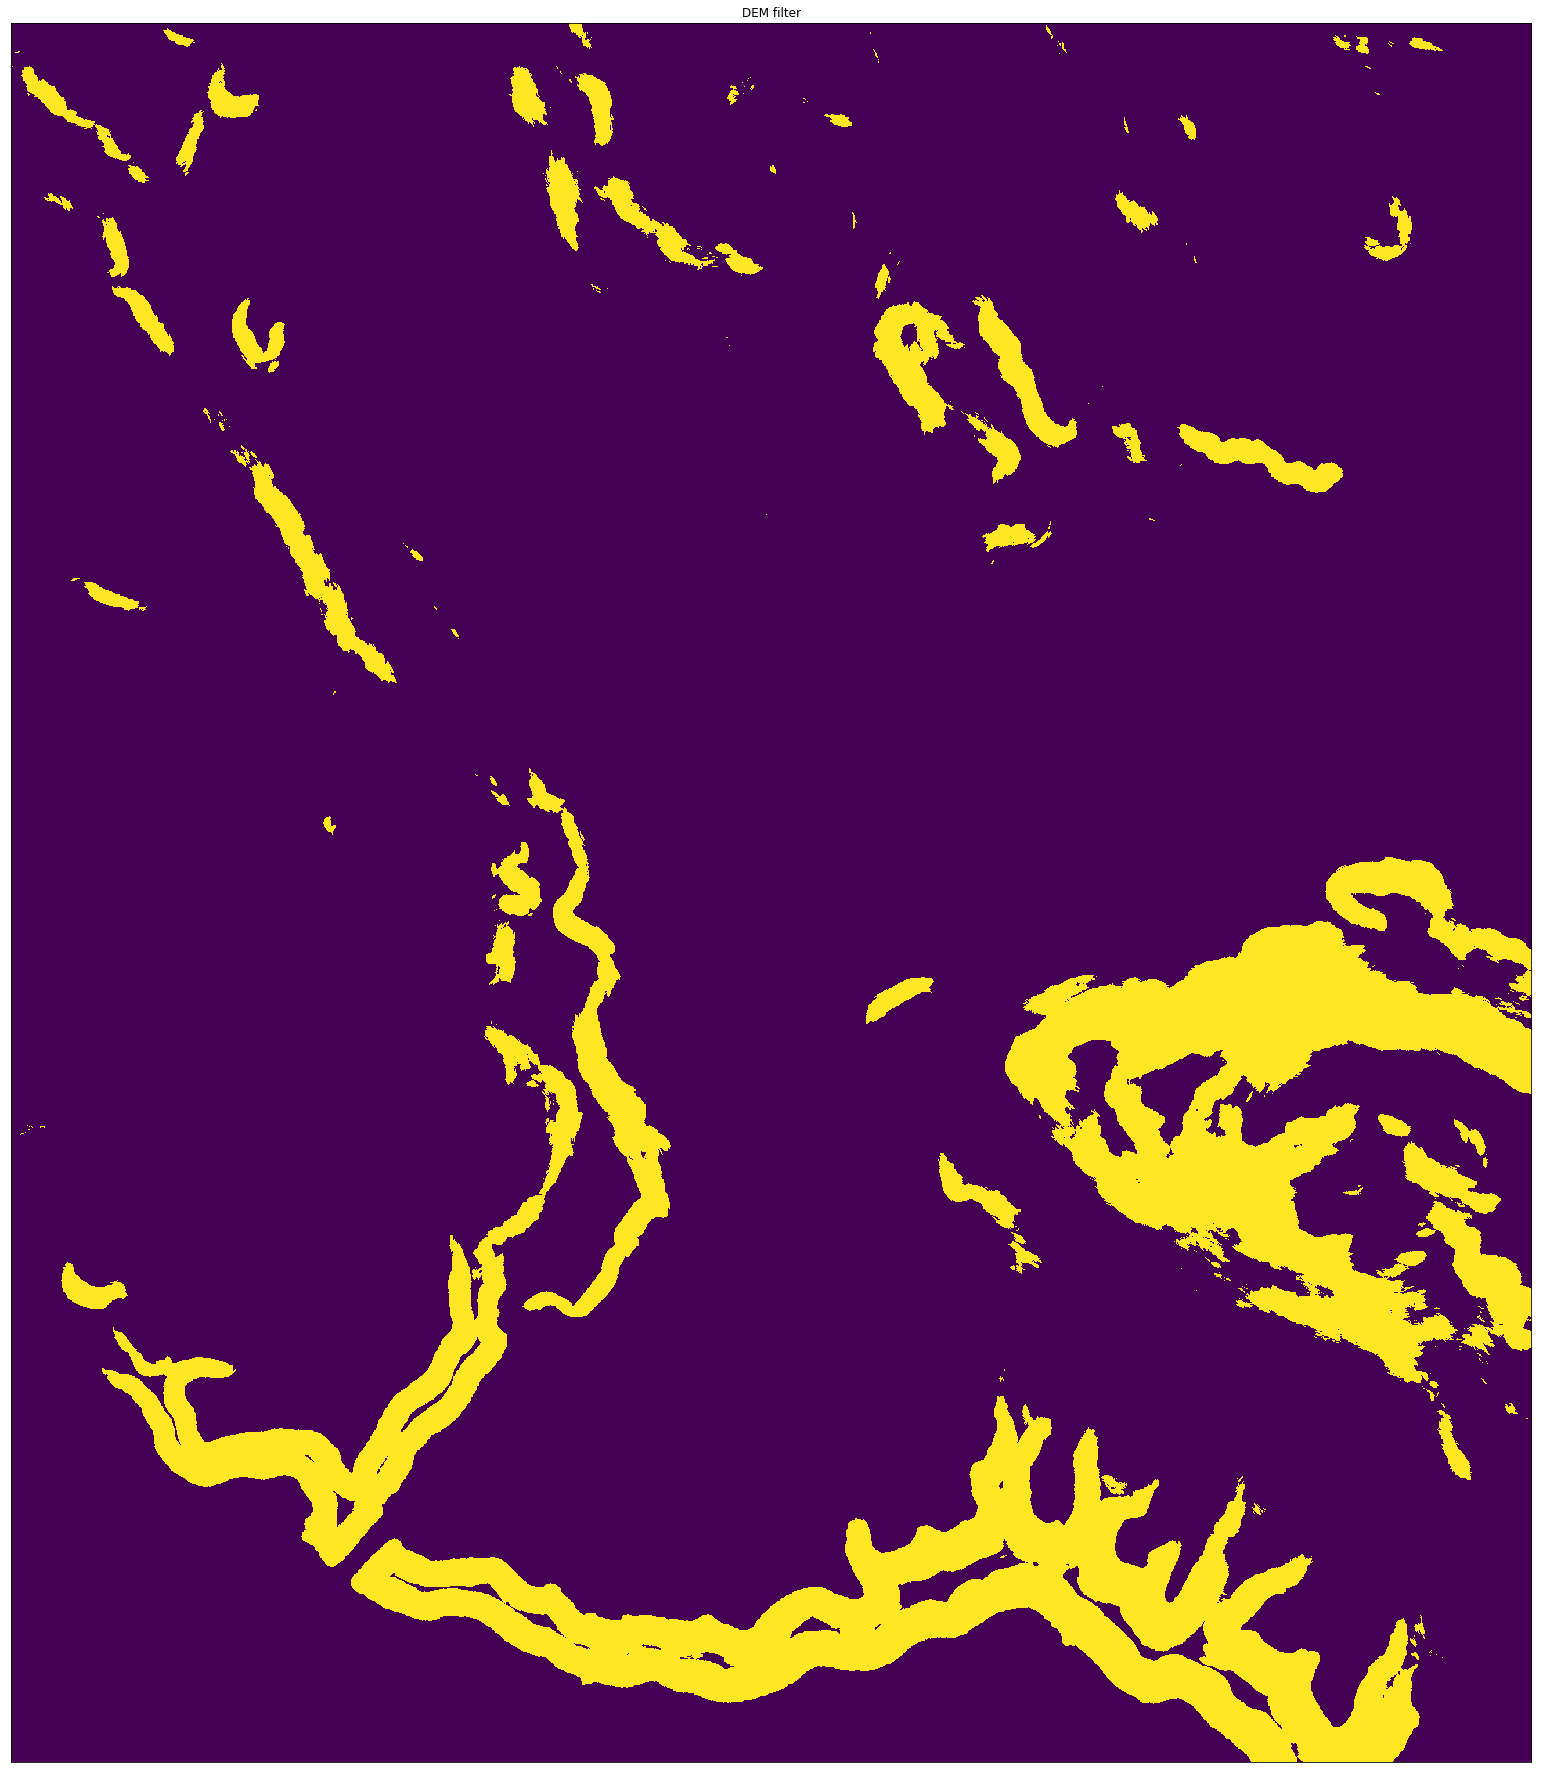

In [122]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("DEM filter")
ax[0].imshow(minMaxDiff)

In [129]:
closing = morph.binary_closing(minMaxDiff, structure=helpers.create_circular_mask(10))

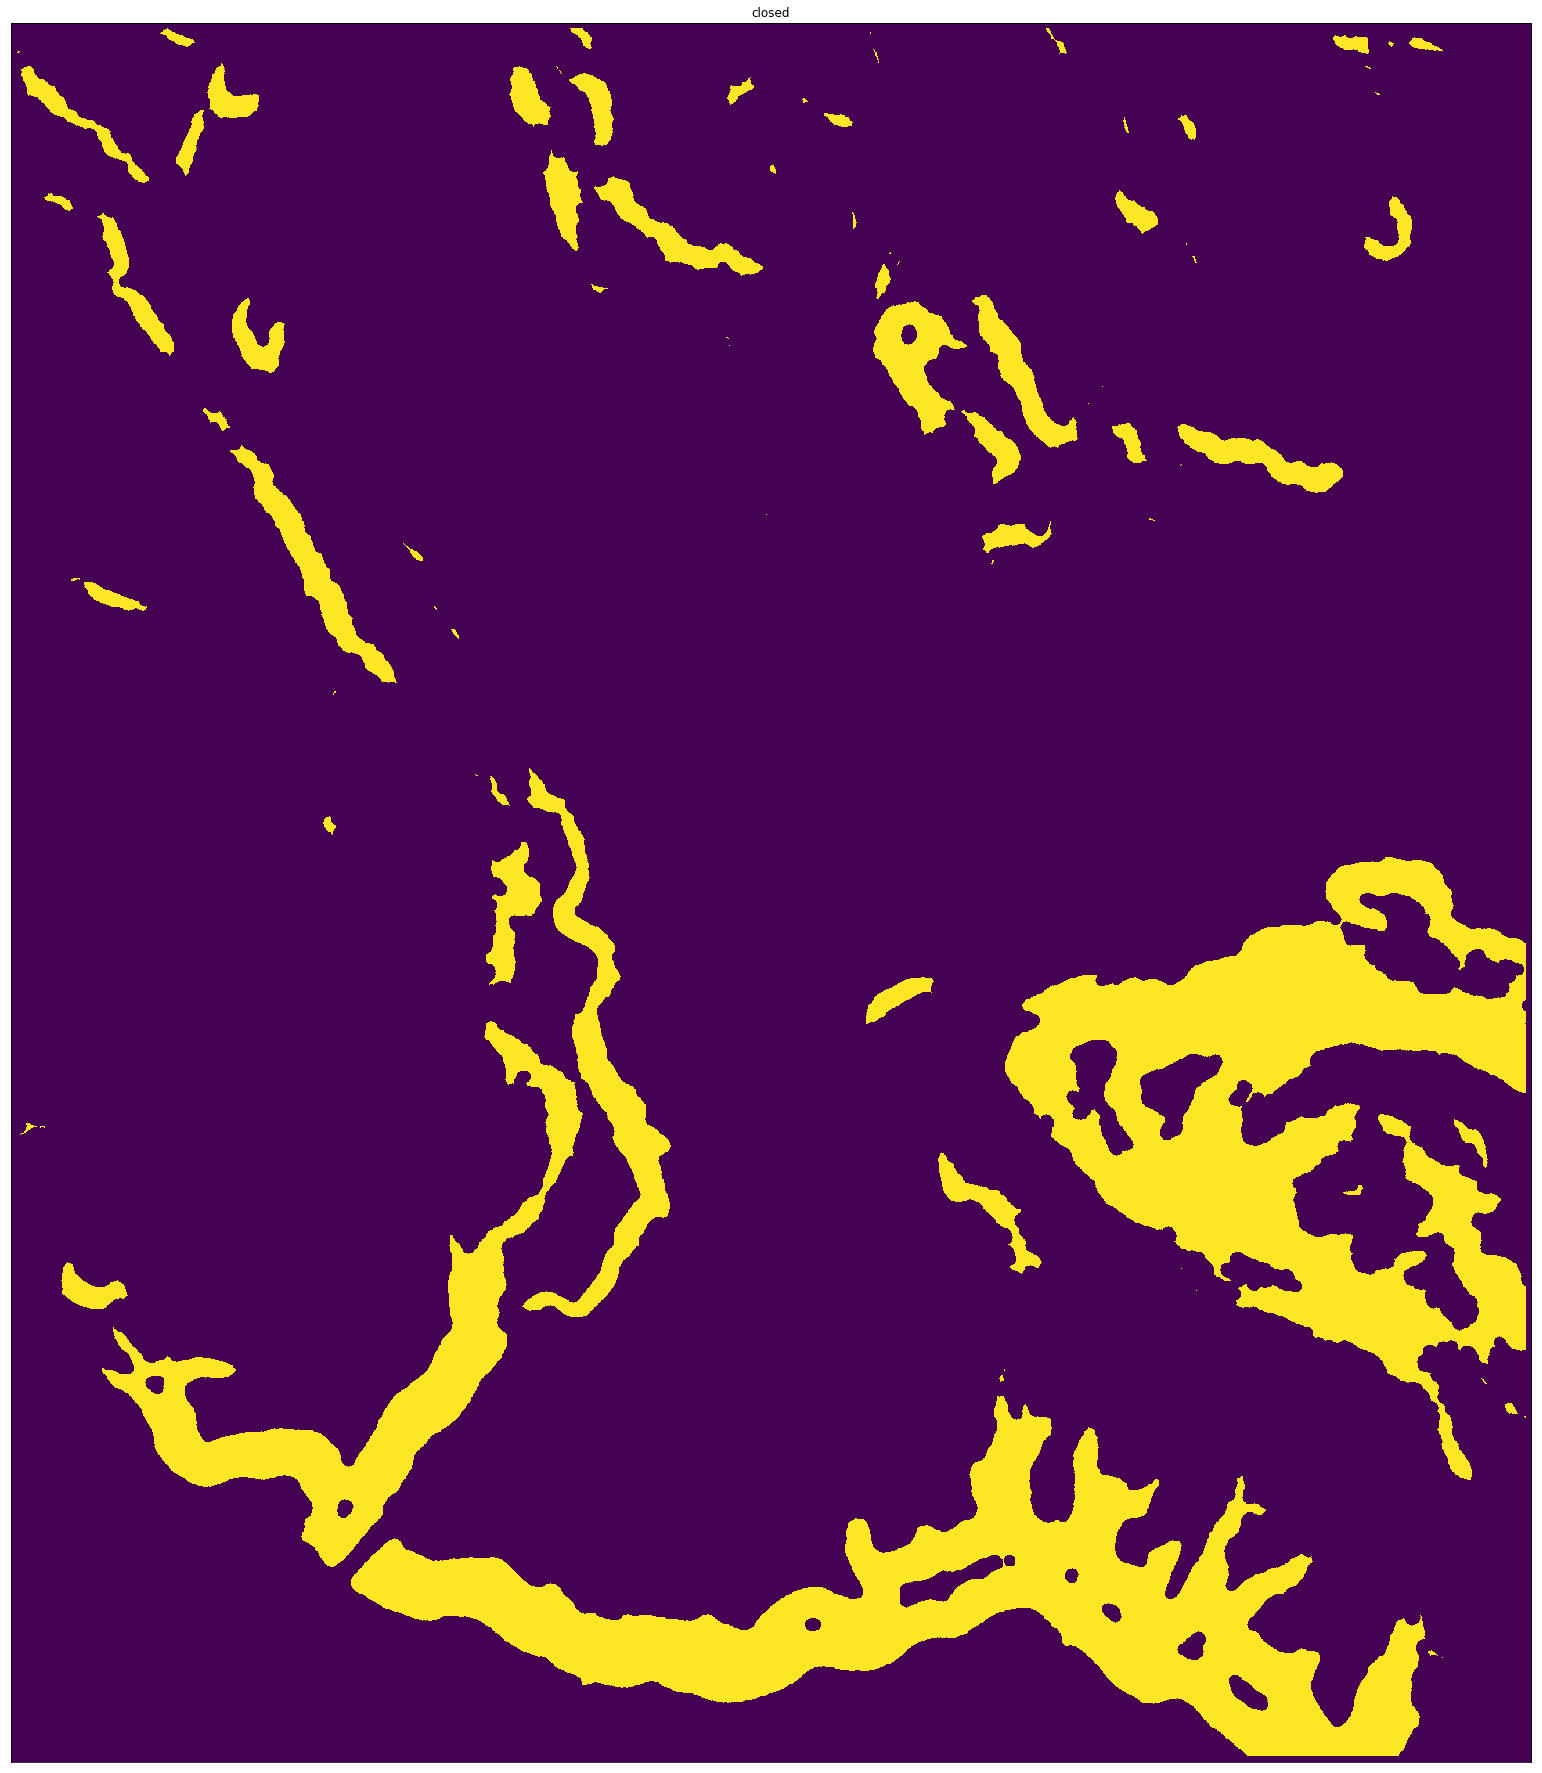

In [133]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("closed")
ax[0].imshow(closing2)